<a href="https://colab.research.google.com/github/ClapBacteria/MachineLearning/blob/main/findfruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://bit.ly/fruits_300_data -o fruits_300.npy

In [ ]:
!ls -al

total 2956
drwxr-xr-x 1 root root    4096 Nov  7 05:17 .
drwxr-xr-x 1 root root    4096 Nov  7 05:06 ..
drwxr-xr-x 4 root root    4096 Nov  5 14:22 .config
-rw-r--r-- 1 root root 3000128 Nov  7 05:17 fruits_300_data
-rw-r--r-- 1 root root    5706 Nov  7 05:17 fruits_300.npy
drwxr-xr-x 1 root root    4096 Nov  5 14:22 sample_data


In [ ]:
import numpy as np
fruits = np.load('fruits_300_data')
print(fruits.shape)


(300, 100, 100)


[  1   1   1   1   1   1   1   1   1   3   2   2  97 106 110 106 110 108
 110 112 109 109 115 110 110 108 110 113 115 117 116 114 117 120 119 116
 120 124 126 126 126 126 128 130 131 132 133 134 137 138 140 144 150 155
 157 158 161 159 165 168 169 171 173 177 180 182 184 188 190 191 194 195
 202 204 211 214 217 219 220 222 224 230 222 227 228 229 229 230 227 197
  55   8   2   1   4   2   1   1   1   1]


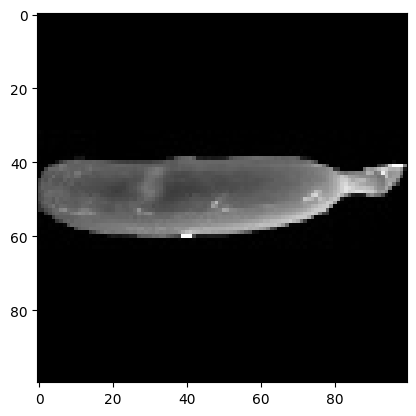

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(fruits[200], cmap='gray')
plt.show
print(fruits[50, 80, :])

In [ ]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
#print(apple.shape)
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


AttributeError: 'numpy.ndarray' object attribute 'mean' is read-only

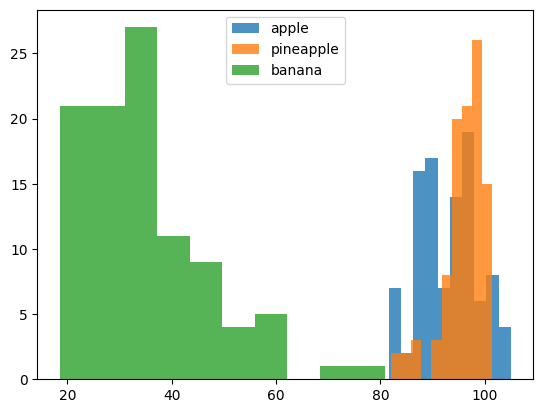

In [ ]:
import matplotlib.pyplot as plt
plt.hist(apple.mean(axis=1), alpha=0.8)
plt.hist(pineapple.mean(axis=1), alpha=0.8)
plt.hist(banana.mean(axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show


In [ ]:
import numpy as np
apple_mean = apple.mean(axis=0).reshape(100,100)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_diff.shape)
print(abs_mean.shape)
apple_index = np.argsort(abs_mean)[0:100]
print(apple_index)

ValueError: cannot reshape array of size 100 into shape (100,100)

In [ ]:
import numpy as np
fruits = np.load('fruits_300_data')
print(fruits.shape)
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)

(300, 100, 100)
(300, 10000)
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
